# 14/07/2022

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot

from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
x=2*np.random.rand(100, 1)
y=4+3*x+np.random.rand(100, 1)

In [ ]:
x_b=np.c_[np.ones((100, 1)),x]
theta_best=np.linalg.inv(x_b.T@x_b)@x_b.T@y
theta_best

array([[4.54969188],
       [2.98713058]])

In [ ]:
y_pred=x_b@theta_best
y_pred

array([[ 9.46025913],
       [ 5.14971268],
       [ 8.95853351],
       [ 7.78799476],
       [ 7.89906541],
       [ 5.32814275],
       [10.39826357],
       [ 9.44163036],
       [ 8.27930966],
       [ 8.04667499],
       [ 6.81763871],
       [ 9.60322463],
       [ 6.18937058],
       [ 7.91409217],
       [ 8.201732  ],
       [ 7.38235799],
       [ 9.67606298],
       [ 5.53334256],
       [10.46566139],
       [ 4.90916516],
       [ 5.56730328],
       [ 8.59054889],
       [ 5.69130705],
       [10.00896034],
       [ 5.6778495 ],
       [ 6.23224148],
       [ 6.77846903],
       [ 5.40799549],
       [ 5.41592048],
       [ 6.94451771],
       [ 5.53486109],
       [ 8.45295277],
       [ 9.21650843],
       [ 6.68909724],
       [ 9.80369074],
       [ 8.61779463],
       [ 5.10034064],
       [ 7.94733959],
       [ 6.22072163],
       [ 6.36161639],
       [ 5.49883159],
       [ 6.75556787],
       [ 7.86156791],
       [ 7.76921618],
       [ 5.93131856],
       [10

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [ ]:
lin_reg.intercept_,lin_reg.coef_

(array([4.54969188]), array([[2.98713058]]))

In [ ]:
x_new=np.array([[0], [2]])
y_predict=lin_reg.predict(x_new)
y_predict

array([[ 4.54969188],
       [10.52395304]])

In [ ]:
from sklearn.metrics import mean_squared_error
y_new=4-3*x_new
mse=mean_squared_error(y_new, y_predict)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

79.44093253369834
8.912964295547152


In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000, penalty=None, eta0=0.05)
sgd_reg.fit(x, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)
x_new=np.array([[0], [2]])
y_predict=sgd_reg.predict(x_new)
y_predict

[4.46829149] [3.06392078]


array([ 4.46829149, 10.59613306])

In [ ]:
def residplot(y_true, y_pred, x, weights):
  residuals=np.sqrt(weights)*np.array(y_true-y_pred)
  plt.figure()
  plt.scatter(x, residuals)
  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:,np.newaxis]
y=np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [ ]:
print(pd.DataFrame(x).head())

       0
0  258.0
1  270.0
2  294.0
3  320.0
4  342.0


In [ ]:
# help section
train_test_split?

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(10, 1)
(7, 1)
(3, 1)


In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)
y_lin_pred=lr.predict(x_test)

In [ ]:
lr.score(x_test, y_test)

0.25716442445279963

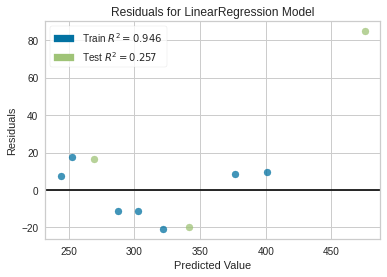

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(lr, hist=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [ ]:
poly=PolynomialFeatures(degree=3)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

In [ ]:
print(pd.DataFrame(x_train).head())
print(pd.DataFrame(x_train2).head())

       0
0  342.0
1  258.0
2  320.0
3  270.0
4  446.0
     0      1         2           3
0  1.0  342.0  116964.0  40001688.0
1  1.0  258.0   66564.0  17173512.0
2  1.0  320.0  102400.0  32768000.0
3  1.0  270.0   72900.0  19683000.0
4  1.0  446.0  198916.0  88716536.0


In [ ]:
poly_clf=LinearRegression()
poly_clf.fit(x_train2, y_train)
y_pred=poly_clf.predict(x_test2)
poly_clf.score(x_test2, y_test)

0.6978434987815111

In [ ]:
print(mean_squared_error(y_test, y_lin_pred), mean_squared_error(y_test, y_pred))


2608.838541321768 1061.173632279333


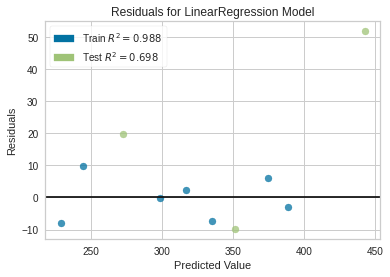

In [ ]:
visualizer=ResidualsPlot(poly_clf, hist=False)
visualizer.fit(x_train2, y_train)
visualizer.score(x_test2, y_test)
visualizer.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(x_train, y_train)
y_ridge_fit=ridge.predict(x_test)
ridge_poly=Ridge(alpha=1)
ridge_poly.fit(x_train2, y_train)
y_ridge_fit=ridge_poly.predict(x_test2)

In [ ]:
print(format(ridge.score(x_test, y_test)))
print(np.sum(ridge.coef_!=0))
print(format(ridge_poly.score(x_test2, y_test)))
print(np.sum(ridge_poly.coef_ !=0))

0.25722108736944294
1
0.9244647367772705
3


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_lasso_fit=lasso.predict(x_test)

In [ ]:
print(format(lasso.score(x_train, y_train)))
print(format(lasso.score(x_test, y_test)))
print(np.sum(lasso.coef_!=0))

0.9456511724637907
0.25722054349129886
1


# Boston Housing Price Prediction

1) import data and convert to dataframes. extract x and y values.
2) data visualization - info(), describe().
3) find corr. remove features causing leakage if exists.
4) to predict numerical output use regression.
5) split data.
6) 

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
boston_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
x=boston_df.drop('Price', axis=1)
y=boston_df['Price']

In [ ]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
boston_df[boston_df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price


In [ ]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
pd.DataFrame(x).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
corr=boston_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
boston_lr=LinearRegression()
boston_lr.fit(x_train, y_train)
boston_y_pred_lr=boston_lr.predict(x_test)

In [ ]:
boston_lr.intercept_, boston_lr.coef_

(46.39649387182328,
 array([-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,  2.43955988e+00,
        -2.14699650e+01,  2.79581385e+00,  3.57459778e-03, -1.51627218e+00,
         3.07541745e-01, -1.12800166e-02, -1.00546640e+00,  6.45018446e-03,
        -5.68834539e-01]))

In [ ]:
boston_rr=SGDRegressor(max_iter=1000, penalty=None, eta0=0.05)
boston_rr.fit(x, y.ravel())
boston_y_pred_rr=boston_rr.predict(x_test)

In [ ]:
boston_rr.intercept_, boston_rr.coef_

In [ ]:
boston_poly=PolynomialFeatures(degree=2)
x_train2=boston_poly.fit_transform(x_train)
x_test2=boston_poly.fit_transform(x_test)

In [ ]:
print(pd.DataFrame(x_train).head())
print(pd.DataFrame(x_train2).head())

In [ ]:
boston_rr2=Ridge(alpha=1)
boston_rr2.fit(x_train, y_train)
boston_y_pred_rr2=boston_rr2.predict(x_test)
boston_rr2_poly=Ridge(alpha=1)


regression
ridge
lasso
polynomial

In [ ]:
print(np.sqrt(mean_squared_error(y_test, boston_y_pred_lr)), 
      np.sqrt(mean_squared_error(y_test, boston_y_pred_rr)), 
      np.sqrt(mean_squared_error(y_test, boston_y_pred_lasso)), 
      np.sqrt(mean_squared_error(y_test, boston_y_pred_poly)))

In [ ]:
print(r2_score(y_test, boston_y_lr_pred), 
      r2_score(y_test, boston_y_rr_pred), 
      r2_score(y_test, boston_y_lasso_pred), 
      r2_score(y_test, boston_y_poly_pred), )

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
boston_cv_lr=np.mean(cross_val_score(boston_lr, x_train, y_train, cv=5))
boston_cv_lr

In [ ]:
boston_cv_rr=np.mean(cross_val_score(boston_rr, x_train, y_train, cv=5))
boston_cv_rr

In [ ]:
boston_cv_lasso=np.mean(cross_val_score(boston_lasso, x_train, y_train, cv=5))
boston_cv_lasso

In [ ]:
boston_cv_poly=np.mean(cross_val_score(boston_poly, x_train, y_train, cv=5))
boston_cv_poly